In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

Saving img1.jpg to img1 (1).jpg


Saving img2.jpg to img2 (1).jpg


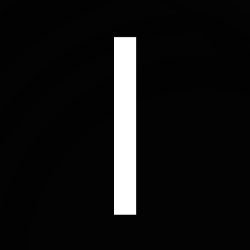

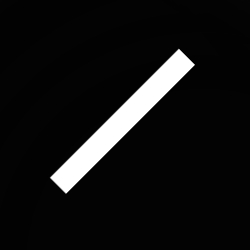

In [4]:
# I1 = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
# I2 = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)

# cv2.imshow('image', I1)
# cv2.imshow('image2', I2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

from google.colab import files
myfile = files.upload()
myfile2 = files.upload()


I1 = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
I2 = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)

from google.colab.patches import cv2_imshow # colab에서 cv2.imshow를 이용하기 위한 코드
cv2_imshow(I1)
cv2_imshow(I2)

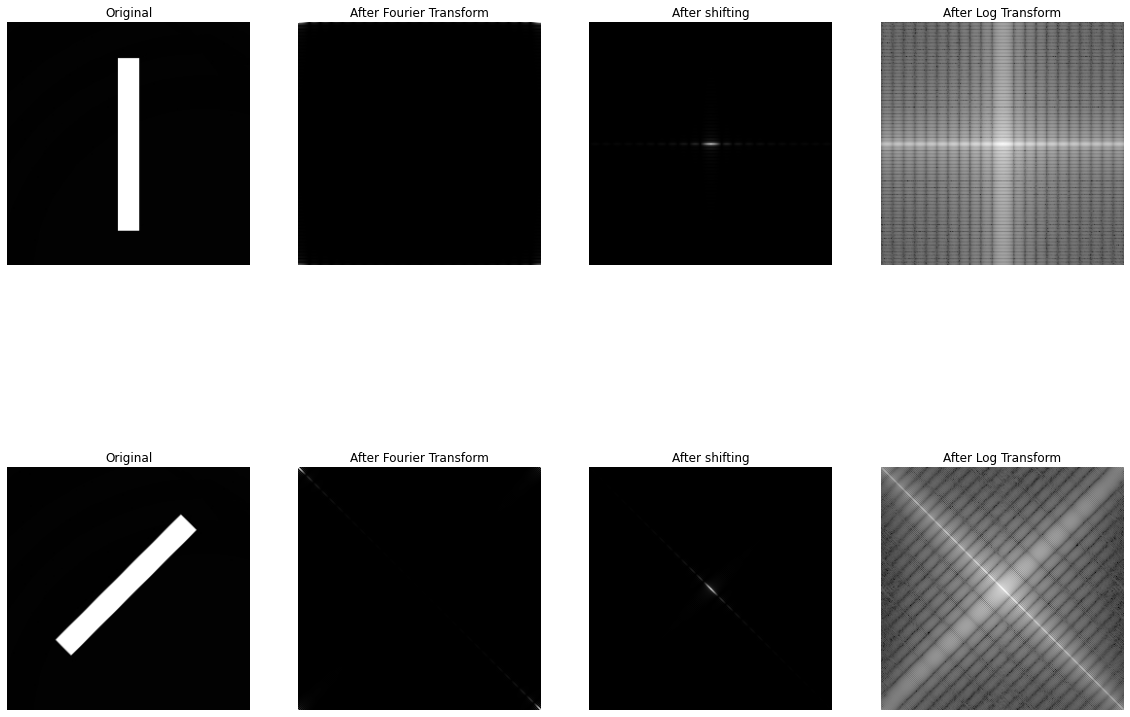

In [38]:
fig = plt.figure(figsize = (20, 15)) 
rows = 2
cols = 4
  
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(I1, cmap='gray')
ax1.set_title('Original')
ax1.axis("off")
 
# Step2
f = np.fft.fft2(I1) # 이미지를 FFT 진행          
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(np.abs(f), cmap='gray')
ax2.set_title('After Fourier Transform')
ax2.axis("off")

# Step3.
f_shift = np.fft.fftshift(f) #centered FFT
ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(np.abs(f_shift), cmap='gray')
ax3.set_title('After shifting') 
ax3.axis("off")

# Step4. 
o_max = np.max(np.abs(f_shift)) # f_shift의 최대밝기
c = 255 / np.log(o_max) # f_shift의 최대밝기일때 출력의 maximum을 255로 지정
#intensity의 최댓값이 뭔지 정확히 모르기 때문에 출력 최댓값을 255로 맞춰줌 o_max = 1159374.0 c=18.2620399544718

magnitude_spectrum = c * np.log(np.abs(f_shift))  #Log transform
ax4 = fig.add_subplot(rows, cols, 4)
ax4.imshow(magnitude_spectrum, cmap='gray')
ax4.set_title('After Log Transform')
ax4.axis("off")

ax5 = fig.add_subplot(rows, cols, 5)
ax5.imshow(I2, cmap='gray')
ax5.set_title('Original')
ax5.axis("off")

# 위와 같은 출력이 나오는 이유 
# 이산 푸리에 변환에서 F(u, v)는 x축 주기 W/u 픽셀, y축 주기 H/v 픽셀인 주기성분의 계수인데
# 원본이미지에서 x축 방향 주기성분이 나타나기 때문에 Spectrum에서 F(u,0)수평방향 peak가 나타나는 것이다.
# 이를 log transform 했을때 수직방향 주기성분도 약간 있다는 것이 보여진다.
 
# Step2. Fourier Spectrum
f2 = np.fft.fft2(I2) 
ax6 = fig.add_subplot(rows, cols, 6)
ax6.imshow( np.abs(f2) , cmap='gray') 
ax6.set_title('After Fourier Transform')
ax6.axis("off")

# Step3. centered shift
f2_shift = np.fft.fftshift(f2)
ax7 = fig.add_subplot(rows, cols, 7)
ax7.imshow( np.abs(f2_shift) , cmap='gray') 
ax7.set_title('After shifting')
ax7.axis("off")

# Step4. log transform.
o_max2 = np.max(np.abs(f2_shift)) # f_shift2의 최대밝기
c = 255 / np.log(o_max2) # f2_shift의 최대밝기일때 출력의 maximum을 255로 지정
#intensity의 최댓값이 뭔지 정확히 모르기 때문에 출력 최댓값을 255로 맞춰줌 o_max = 1159374.0 c=18.201823608251583

magnitude_spectrum2 = c * np.log(np.abs(f2_shift))
ax8 = fig.add_subplot(rows, cols, 8)
ax8.imshow( magnitude_spectrum2 , cmap='gray')
ax8.set_title('After Log Transform')
ax8.axis("off")

# 위와 같은 출력이 나오는 이유 
# 이산 푸리에 변환에서 F(u, v)는 x축 주기 W/u 픽셀, y축 주기 H/v 픽셀인 주기성분의 계수인데
# 원본이미지에서 x=y인 방향에 주기성분이 발견되기 때문에 Spectrum에서 F(u,u) 방향에 peak가 나타나게 된다.
# 이를 log transform 했을때 x=-y방향 주기성분도 약간 있다는 것이 보여진다.

plt.show()
